In [1]:
import warnings
import pandas as pd
import numpy as np

# ignore all warnings
warnings. filterwarnings("ignore")

# read data into dataframe variable df
df = pd.read_csv("D:\Devisha Bhargava\data set\Credit Card Customer Data.csv")
print('Size of drivers test dataframe is :', df.shape)

# display first few rows of data
df.head()

Size of drivers test dataframe is : (660, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [2]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [4]:
# select columns to cluster

cluster_columns = ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

df = df[cluster_columns]

In [5]:
from sklearn.preprocessing import StandardScaler

# define numerical and categorical columns
numerical_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
categorical_columns = ['Customer Key']

scaler = StandardScaler()

# create a copy of our data to be scaled
df_scale = df.copy()

# standard scale numerical features
for c in numerical_columns:
    df_scale[c] = scaler.fit_transform(df[[c]])

In [6]:
df_scale.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,38414,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,17341,0.410293,1.058973,-0.860451,0.134290,0.145528
3,40496,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,47437,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [8]:
df_out = df_scale[(df_scale['Avg_Credit_Limit'].abs()<=3) & (df_scale['Total_Credit_Cards'].abs()<=3) & (df_scale['Total_visits_bank'].abs()<=3) & (df_scale['Total_visits_online'].abs()<=3) & (df_scale['Total_calls_made'].abs()<=3)]
df_out.shape
df_out.shape

(625, 6)

In [9]:
!pip install KPrototypes 
!pip install kmodes

In [10]:
from kmodes.kprototypes import KPrototypes

categorical_indexes = []

for c in categorical_columns:
    categorical_indexes.append(df.columns.get_loc(c))

categorical_indexes

[0]

Text(0, 0.5, 'mean distance')

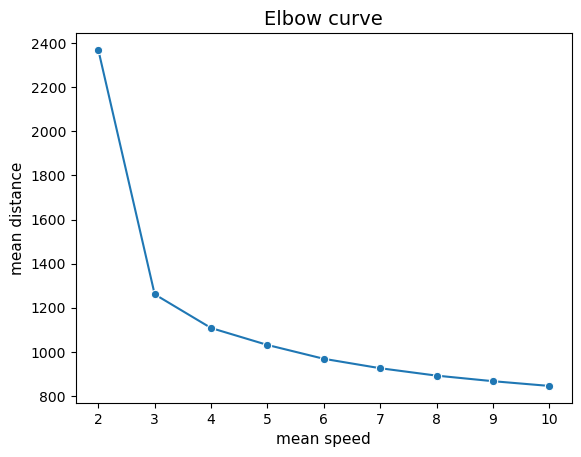

In [11]:
import seaborn as sns

num_clusters = list(range(2, 11))

cost_values = []

# calculate cost values for each number of clusters (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cost_values.append(kproto.cost_)

# plot cost against number of clusters
ax = sns.lineplot(x=num_clusters, y=cost_values, marker="o")
ax.set_title('Elbow curve', fontsize=14)
ax.set_xlabel('Limits', fontsize=11)
ax.set_ylabel('Avg_Credit_Limit', fontsize=11)

Text(0, 0.5, 'mean distance')

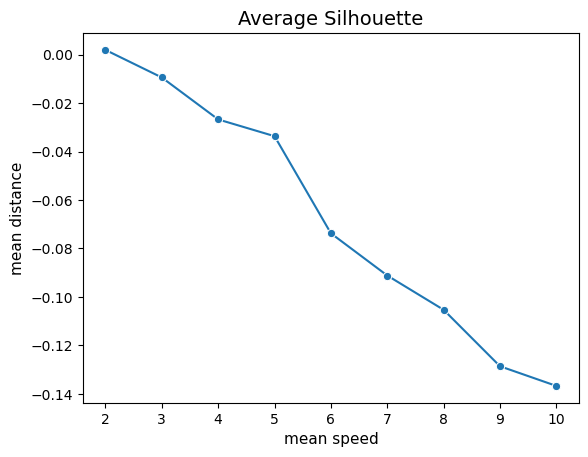

In [12]:
from sklearn.metrics import silhouette_score

silhouette_avg = []

# calculate average silhouette score for each number of cluster (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(df_scale, cluster_labels))

# plot average silhouette score against number of clusters
ax = sns.lineplot(x=num_clusters, y=silhouette_avg, marker="o")
ax.set_title('Average Silhouette', fontsize=14)
ax.set_xlabel('mean speed', fontsize=11)
ax.set_ylabel('mean distance', fontsize=11)

In [13]:
# we set the number of clusters to 5
kproto = KPrototypes(n_clusters= 5, init='Huang', n_init = 25, random_state=42)
kproto.fit_predict(df_scale, categorical= categorical_indexes)

# store cluster labels
cluster_labels = kproto.labels_

# add clusters to dataframe
df["cluster"] = cluster_labels

# check if clusters have been added to the dataframe
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,87073,100000,2,1,1,0,3
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,3
3,40496,30000,5,1,1,4,3
4,47437,100000,6,0,12,3,4


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scale)

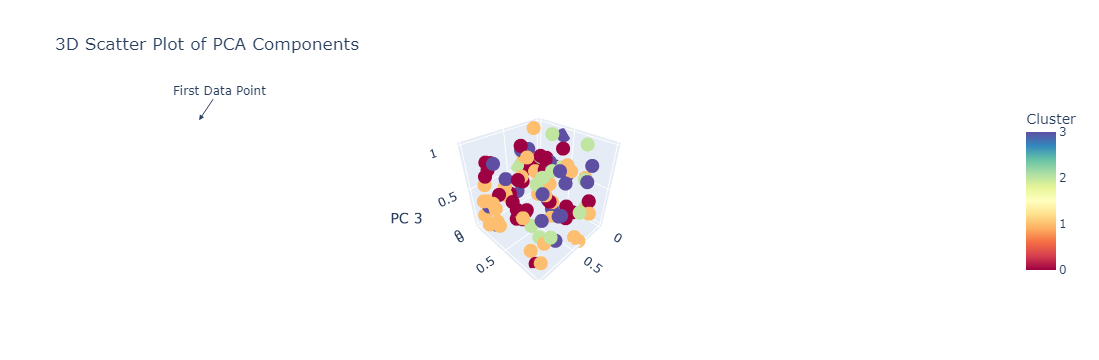

In [49]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Example DataFrame with PCA data and clusters
pca_df = np.random.rand(100, 3)  # Replace with your PCA data
df = pd.DataFrame({
    'cluster': np.random.choice(['A', 'B', 'C', 'D'], size=100)  # Example clusters
})

# Convert categorical cluster labels to numeric values
df['cluster_numeric'] = df['cluster'].astype('category').cat.codes

# Combine PCA data and cluster data
pca_df = pd.DataFrame(pca_df, columns=['x', 'y', 'z'])
pca_df['cluster'] = df['cluster']
pca_df['cluster_numeric'] = df['cluster_numeric']

# Create the 3D scatter plot
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter3d(
    x=pca_df['x'],
    y=pca_df['y'],
    z=pca_df['z'],
    mode='markers',
    marker=dict(
        size=8,
        color=pca_df['cluster_numeric'],  # Numeric color values
        colorscale='Spectral',  # Color scale
        colorbar=dict(title='Cluster')  # Colorbar title
    ),
    text=pca_df['cluster'],  # Hover text
    hoverinfo='text+x+y+z'  # Display x, y, z values on hover
))

# Add title and axis labels
fig.update_layout(
    title='3D Scatter Plot of PCA Components',
    scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    ),
    legend_title='Cluster'
)

# Add annotations (example: annotating the first point)
fig.add_annotation(
    dict(
        x=pca_df['x'].iloc[0],
        y=pca_df['y'].iloc[0],
       # z=pca_df['z'].iloc[0],
        text='First Data Point',
        showarrow=True,
        arrowhead=2,
        ax=20,
        ay=-30
    )
)

fig.show()


In [16]:
# size of each cluster

df["cluster"].value_counts()

cluster
3    196
2    190
0    123
1    101
4     50
Name: count, dtype: int64

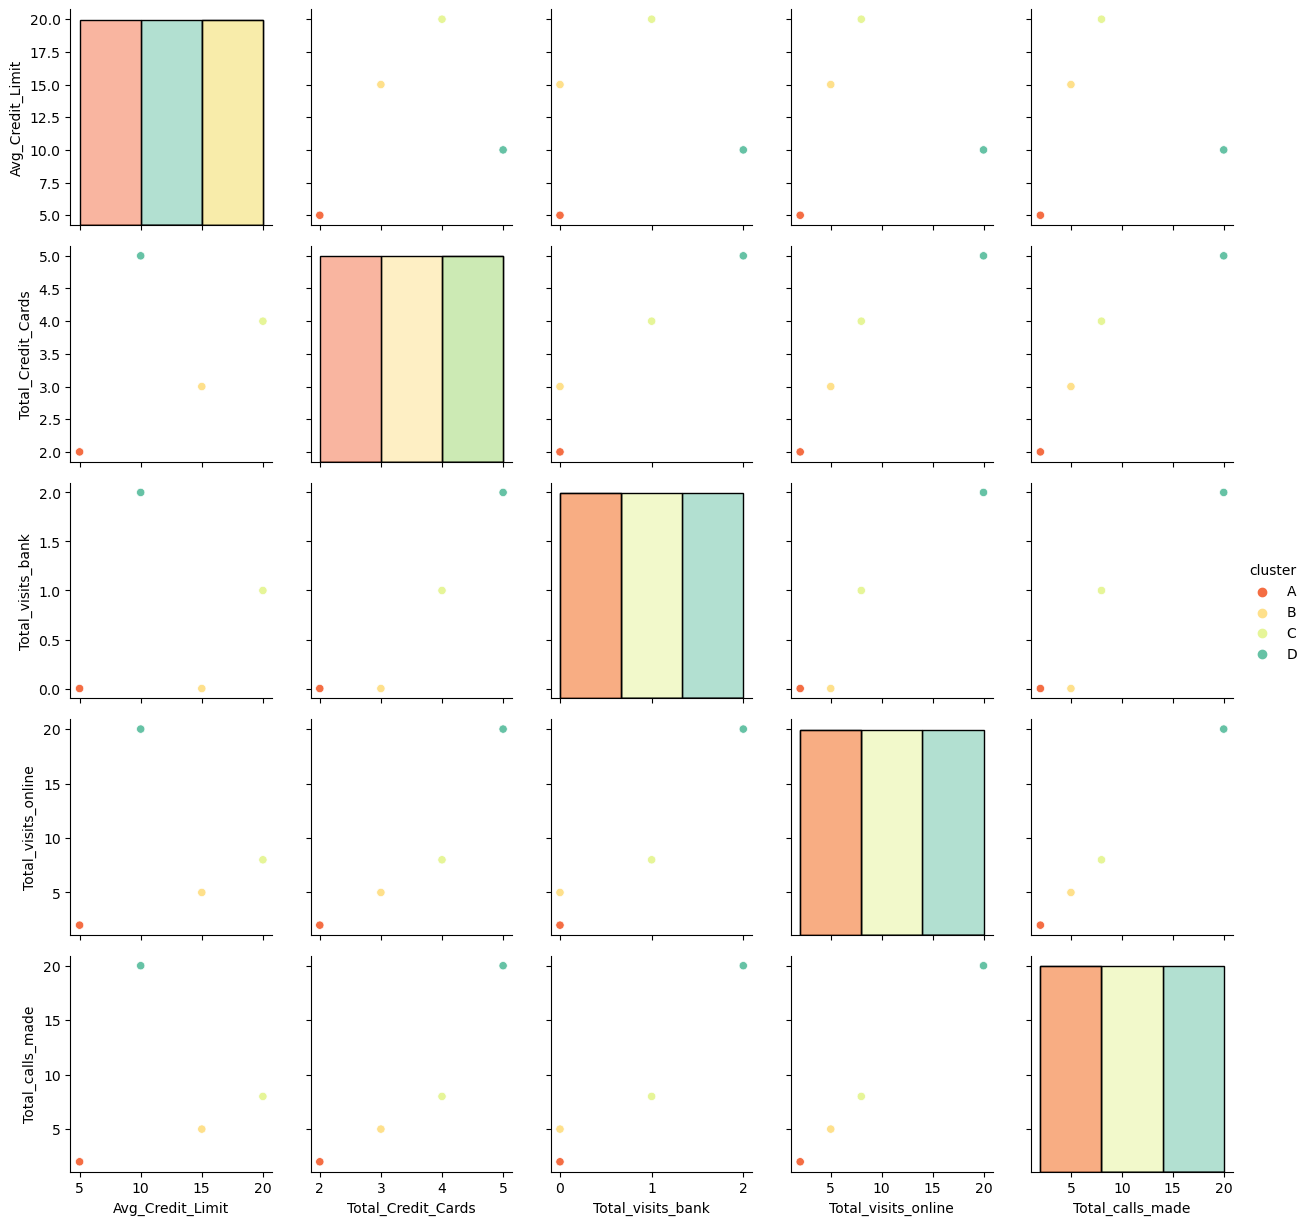

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({
    'Avg_Credit_Limit': [5, 15, 20, 10],
    'Total_Credit_Cards': [2, 3, 4, 5],
    'Total_visits_bank': [0,0,1,2],
    'Total_calls_made': [2,5,8,20],
    'Total_visits_online': [2,5,8,20], 
    'cluster': ['A', 'B', 'C', 'D']
})

# Ensure the DataFrame includes the 'cluster' column
df_subset = df[["Avg_Credit_Limit", "Total_Credit_Cards","Total_visits_bank","Total_visits_online", "Total_calls_made", "cluster"]]

# Create PairGrid
g = sns.PairGrid(df_subset, hue="cluster", palette='Spectral')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()


Customer Key              int64
Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank      category
Total_visits_online       int64
Total_calls_made          int64
cluster                category
dtype: object
Total_visits_bank    0
cluster              0
dtype: int64


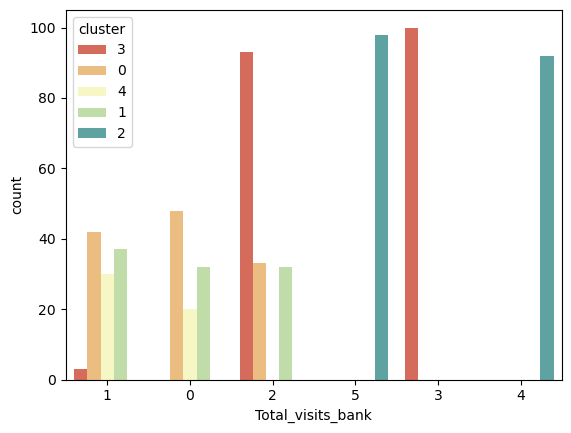

In [27]:
print(df.dtypes)
df['Total_visits_bank'] = df['Total_visits_bank'].astype(str)
df['cluster'] = df['cluster'].astype(str)
print(df[['Total_visits_bank', 'cluster']].isnull().sum())

# If there are missing values, you might need to handle them
df = df.dropna(subset=['Total_visits_bank', 'cluster'])
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x='Total_visits_bank', hue='cluster', palette='Spectral')
plt.show()


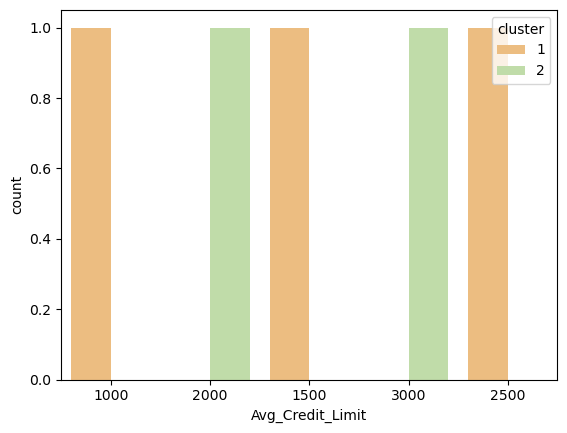

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({
    'Avg_Credit_Limit': [1000, 2000, 1500, 3000, 2500],
    'cluster': [1, 2, 1, 2, 1]
})

# Convert columns to string if necessary
df['Avg_Credit_Limit'] = df['Avg_Credit_Limit'].astype(str)
df['cluster'] = df['cluster'].astype(str)

# Drop rows with missing values if any
df = df.dropna(subset=['Avg_Credit_Limit', 'cluster'])

# Plot
ax = sns.countplot(data=df, x='Avg_Credit_Limit', hue='cluster', palette='Spectral')
plt.show()


In [30]:
df[df["cluster"] == 2].describe()

,Avg_Credit_Limit,cluster
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN
